In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/Administrator/Desktop/stock_study/')

from Investar import Analyzer



In [2]:
mk = Analyzer.MarketDB()

In [3]:
stocks = ["삼성전자","한화솔루션","한컴위드","현대자동차"]

In [4]:
df = pd.DataFrame()
for s in stocks:
    df[s] = mk.get_daily_price(s, "2018-10-12")["close"]

end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'
end_date is initialized to '2021-01-06'


In [5]:
df

,삼성전자,한화솔루션,한컴위드,현대자동차
date,,,,
2018-10-12,44000,16850,2765,115500
2018-10-15,43800,16500,2750,113500
2018-10-16,43600,16550,2815,116500
2018-10-17,44150,17200,2880,118500
2018-10-18,44050,16800,2880,116000
...,...,...,...,...
2020-12-29,78300,47500,6330,190500
2020-12-30,81000,47900,6350,192000
2021-01-04,83000,49200,6350,207500


In [6]:
daily_ret = df.pct_change()
annual_ret = daily_ret.mean()*252
daily_cov = daily_ret.cov()
annual_cov = daily_cov * 252

port_ret = []
port_risk = []
port_weights = []

In [7]:
daily_ret

,삼성전자,한화솔루션,한컴위드,현대자동차
date,,,,
2018-10-12,NaN,NaN,NaN,NaN
2018-10-15,-0.004545,-0.020772,-0.005425,-0.017316
2018-10-16,-0.004566,0.003030,0.023636,0.026432
2018-10-17,0.012615,0.039275,0.023091,0.017167
2018-10-18,-0.002265,-0.023256,0.000000,-0.021097
...,...,...,...,...
2020-12-29,-0.005083,0.054384,0.004762,0.005277
2020-12-30,0.034483,0.008421,0.003160,0.007874
2021-01-04,0.024691,0.027140,0.000000,0.080729


In [8]:
annual_ret

삼성전자     0.325570
한화솔루션    0.674777
한컴위드     0.540857
현대자동차    0.333839
dtype: float64

In [9]:
daily_cov

,삼성전자,한화솔루션,한컴위드,현대자동차
삼성전자,0.000316,0.000243,0.000155,0.000195
한화솔루션,0.000243,0.001191,0.000386,0.000344
한컴위드,0.000155,0.000386,0.000967,0.000266
현대자동차,0.000195,0.000344,0.000266,0.000611


In [10]:
annual_cov

,삼성전자,한화솔루션,한컴위드,현대자동차
삼성전자,0.079715,0.061206,0.038968,0.049176
한화솔루션,0.061206,0.300091,0.097351,0.086569
한컴위드,0.038968,0.097351,0.243646,0.066964
현대자동차,0.049176,0.086569,0.066964,0.154037


In [11]:
for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))
    
    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    
portfolio = {'Returns': port_ret, 'Risk': port_risk}
for i,s in enumerate(stocks):
    portfolio[s] = [weight[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns','Risk'] + [s for s in stocks]]

In [12]:
weights

array([0.44611687, 0.37734172, 0.14476797, 0.03177345])

In [13]:
df

,Returns,Risk,삼성전자,한화솔루션,한컴위드,현대자동차
0,0.501026,0.357664,0.007578,0.272591,0.358969,0.360862
1,0.550422,0.407565,0.061744,0.601251,0.058472,0.278534
2,0.492813,0.325974,0.308793,0.238999,0.386651,0.065557
3,0.465706,0.306741,0.374588,0.293536,0.168521,0.163355
4,0.497576,0.333585,0.202272,0.336079,0.245524,0.216125
...,...,...,...,...,...,...
19995,0.506551,0.337175,0.208354,0.334411,0.291863,0.165372
19996,0.559548,0.390162,0.078413,0.348895,0.518821,0.053870
19997,0.588911,0.415600,0.138992,0.630762,0.198872,0.031374
19998,0.493484,0.332817,0.190504,0.329787,0.235650,0.244059


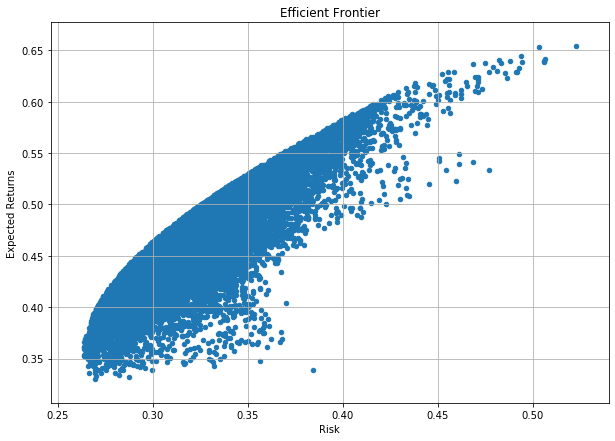

In [15]:
df.plot.scatter(x="Risk",y="Returns", figsize=(10,7), grid =True)
plt.title("Efficient Frontier")
plt.xlabel("Risk")
plt.ylabel("Expected Returns")
plt.show()